Andrés Camilo Ortiz Vale

Universidad Autónoma de Bucaramanga

# Comandos de la clase

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [ ]:
#Datos de propiedades
ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)

In [ ]:
df

Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0   
1        Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0   
2        Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0   
3        Biggin   4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0   
4        Nelson   4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0   
...         ...         ...       ...       ...  ...       ...  ...       ...   
13575     Barry  26/08/2017      16.7    3150.0  ...       2.0  2.0     652.0   
13576  Williams  26/08/2017       6.8    3016.0  ...       2.0  2.0     333.0   
13577     Raine  26/08/2017       6.8    3016.0  ...       2.0  4.0     436.0   
13578   Sweeney  26/08/2017       6.8    3016.0  ...       1.0  5.0     866.0   
13579   Village  26/08/2017       6.3    3013.0  ...       1.0  1.0     362.0   

       BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
0               NaN        NaN        Yarra -37.79960   144.99840   
1              79.0     1900.0        Yarra -37.80790   144.99340   
2             150.0     1900.0        Yarra -37.80930   144.99440   
3               NaN        NaN        Yarra -37.79690   144.99690   
4             142.0     2014.0        Yarra -37.80720   144.99410   
...             ...        ...          ...       ...         ...   
13575           NaN     1981.0          NaN -37.90562   145.16761   
13576         133.0     1995.0          NaN -37.85927   144.87904   
13577           NaN     1997.0          NaN -37.85274   144.88738   
13578         157.0     1920.0          NaN -37.85908   144.89299   
13579         112.0     1920.0          NaN -37.81188   144.88449   

                       Regionname Propertycount  
0           Northern Metropolitan        4019.0  
1           Northern Metropolitan        4019.0  
2           Northern Metropolitan        4019.0  
3           Northern Metropolitan        4019.0  
4           Northern Metropolitan        4019.0  
...                           ...           ...  
13575  South-Eastern Metropolitan        7392.0  
13576        Western Metropolitan        6380.0  
13577        Western Metropolitan        6380.0  
13578        Western Metropolitan        6380.0  
13579        Western Metropolitan        6543.0  

[13580 rows x 21 columns]

In [ ]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
df = df.select_dtypes(exclude=['object'])

In [ ]:
#Buscar nulos
df.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [ ]:
#Borrado de datos nulos
df = df.dropna()
df

Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
1          2  1035000.0       2.5    3067.0       2.0       1.0  0.0   
2          3  1465000.0       2.5    3067.0       3.0       2.0  0.0   
4          4  1600000.0       2.5    3067.0       3.0       1.0  2.0   
6          3  1876000.0       2.5    3067.0       4.0       2.0  0.0   
7          2  1636000.0       2.5    3067.0       2.0       1.0  2.0   
...      ...        ...       ...       ...       ...       ...  ...   
13572      2   650000.0      14.5    3087.0       2.0       1.0  1.0   
13573      4   635000.0      14.7    3030.0       4.0       2.0  1.0   
13576      3  1031000.0       6.8    3016.0       3.0       2.0  2.0   
13578      4  2500000.0       6.8    3016.0       4.0       1.0  5.0   
13579      4  1285000.0       6.3    3013.0       4.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
1         156.0          79.0     1900.0  -37.80790   144.99340         4019.0  
2         134.0         150.0     1900.0  -37.80930   144.99440         4019.0  
4         120.0         142.0     2014.0  -37.80720   144.99410         4019.0  
6         245.0         210.0     1910.0  -37.80240   144.99930         4019.0  
7         256.0         107.0     1890.0  -37.80600   144.99540         4019.0  
...         ...           ...        ...        ...         ...            ...  
13572     210.0          79.0     2006.0  -37.70657   145.07878         2329.0  
13573     662.0         172.0     1980.0  -37.89327   144.64789        16166.0  
13576     333.0         133.0     1995.0  -37.85927   144.87904         6380.0  
13578     866.0         157.0     1920.0  -37.85908   144.89299         6380.0  
13579     362.0         112.0     1920.0  -37.81188   144.88449         6543.0  

[6830 rows x 13 columns]

<Axes: >

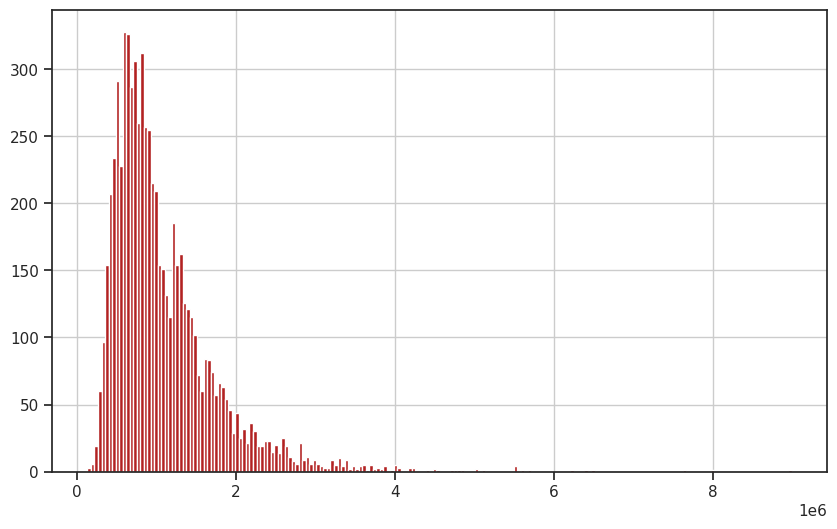

In [ ]:
#Histograma
df.Price.hist(color='firebrick', bins=200, figsize=(10, 6))

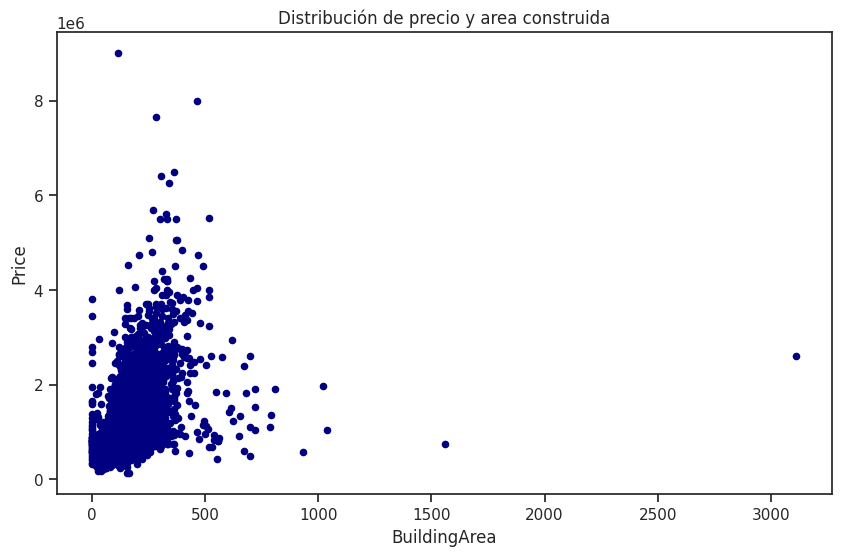

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [ ]:
#Datos con área menor o igual a 800
df0 = df[df["BuildingArea"]<=800]
df0

Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
1          2  1035000.0       2.5    3067.0       2.0       1.0  0.0   
2          3  1465000.0       2.5    3067.0       3.0       2.0  0.0   
4          4  1600000.0       2.5    3067.0       3.0       1.0  2.0   
6          3  1876000.0       2.5    3067.0       4.0       2.0  0.0   
7          2  1636000.0       2.5    3067.0       2.0       1.0  2.0   
...      ...        ...       ...       ...       ...       ...  ...   
13572      2   650000.0      14.5    3087.0       2.0       1.0  1.0   
13573      4   635000.0      14.7    3030.0       4.0       2.0  1.0   
13576      3  1031000.0       6.8    3016.0       3.0       2.0  2.0   
13578      4  2500000.0       6.8    3016.0       4.0       1.0  5.0   
13579      4  1285000.0       6.3    3013.0       4.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
1         156.0          79.0     1900.0  -37.80790   144.99340         4019.0  
2         134.0         150.0     1900.0  -37.80930   144.99440         4019.0  
4         120.0         142.0     2014.0  -37.80720   144.99410         4019.0  
6         245.0         210.0     1910.0  -37.80240   144.99930         4019.0  
7         256.0         107.0     1890.0  -37.80600   144.99540         4019.0  
...         ...           ...        ...        ...         ...            ...  
13572     210.0          79.0     2006.0  -37.70657   145.07878         2329.0  
13573     662.0         172.0     1980.0  -37.89327   144.64789        16166.0  
13576     333.0         133.0     1995.0  -37.85927   144.87904         6380.0  
13578     866.0         157.0     1920.0  -37.85908   144.89299         6380.0  
13579     362.0         112.0     1920.0  -37.81188   144.88449         6543.0  

[6824 rows x 13 columns]

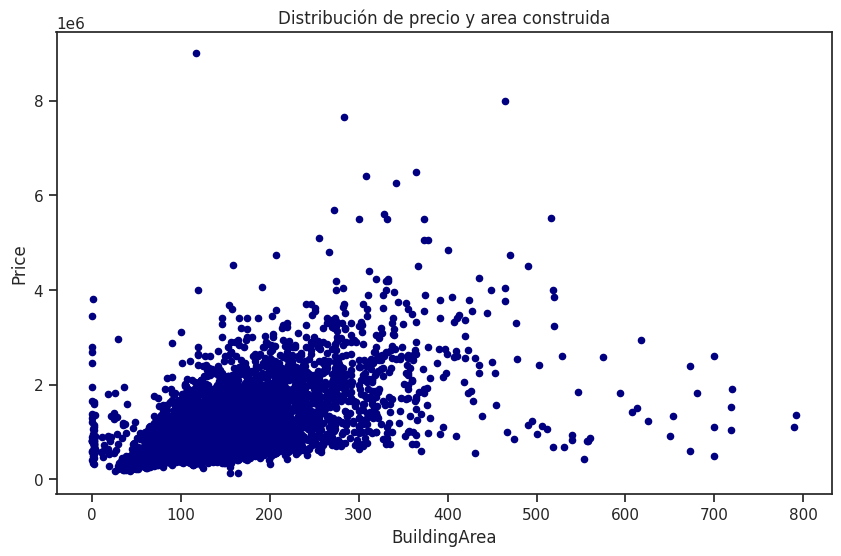

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [ ]:
#Datos con área cero
dfzero = df0[df0["BuildingArea"]<=15]
len(dfzero)

56

In [ ]:
#Se eliminan los registros de menos de 15 mts cuadrados de area
df0 = df0[df0["BuildingArea"]>4]
df0

Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
1          2  1035000.0       2.5    3067.0       2.0       1.0  0.0   
2          3  1465000.0       2.5    3067.0       3.0       2.0  0.0   
4          4  1600000.0       2.5    3067.0       3.0       1.0  2.0   
6          3  1876000.0       2.5    3067.0       4.0       2.0  0.0   
7          2  1636000.0       2.5    3067.0       2.0       1.0  2.0   
...      ...        ...       ...       ...       ...       ...  ...   
13572      2   650000.0      14.5    3087.0       2.0       1.0  1.0   
13573      4   635000.0      14.7    3030.0       4.0       2.0  1.0   
13576      3  1031000.0       6.8    3016.0       3.0       2.0  2.0   
13578      4  2500000.0       6.8    3016.0       4.0       1.0  5.0   
13579      4  1285000.0       6.3    3013.0       4.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
1         156.0          79.0     1900.0  -37.80790   144.99340         4019.0  
2         134.0         150.0     1900.0  -37.80930   144.99440         4019.0  
4         120.0         142.0     2014.0  -37.80720   144.99410         4019.0  
6         245.0         210.0     1910.0  -37.80240   144.99930         4019.0  
7         256.0         107.0     1890.0  -37.80600   144.99540         4019.0  
...         ...           ...        ...        ...         ...            ...  
13572     210.0          79.0     2006.0  -37.70657   145.07878         2329.0  
13573     662.0         172.0     1980.0  -37.89327   144.64789        16166.0  
13576     333.0         133.0     1995.0  -37.85927   144.87904         6380.0  
13578     866.0         157.0     1920.0  -37.85908   144.89299         6380.0  
13579     362.0         112.0     1920.0  -37.81188   144.88449         6543.0  

[6773 rows x 13 columns]

In [ ]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
df0 = df0[(np.abs(zscore(df0['BuildingArea']))<=3)]
df0

Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
1          2  1035000.0       2.5    3067.0       2.0       1.0  0.0   
2          3  1465000.0       2.5    3067.0       3.0       2.0  0.0   
4          4  1600000.0       2.5    3067.0       3.0       1.0  2.0   
6          3  1876000.0       2.5    3067.0       4.0       2.0  0.0   
7          2  1636000.0       2.5    3067.0       2.0       1.0  2.0   
...      ...        ...       ...       ...       ...       ...  ...   
13572      2   650000.0      14.5    3087.0       2.0       1.0  1.0   
13573      4   635000.0      14.7    3030.0       4.0       2.0  1.0   
13576      3  1031000.0       6.8    3016.0       3.0       2.0  2.0   
13578      4  2500000.0       6.8    3016.0       4.0       1.0  5.0   
13579      4  1285000.0       6.3    3013.0       4.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
1         156.0          79.0     1900.0  -37.80790   144.99340         4019.0  
2         134.0         150.0     1900.0  -37.80930   144.99440         4019.0  
4         120.0         142.0     2014.0  -37.80720   144.99410         4019.0  
6         245.0         210.0     1910.0  -37.80240   144.99930         4019.0  
7         256.0         107.0     1890.0  -37.80600   144.99540         4019.0  
...         ...           ...        ...        ...         ...            ...  
13572     210.0          79.0     2006.0  -37.70657   145.07878         2329.0  
13573     662.0         172.0     1980.0  -37.89327   144.64789        16166.0  
13576     333.0         133.0     1995.0  -37.85927   144.87904         6380.0  
13578     866.0         157.0     1920.0  -37.85908   144.89299         6380.0  
13579     362.0         112.0     1920.0  -37.81188   144.88449         6543.0  

[6678 rows x 13 columns]

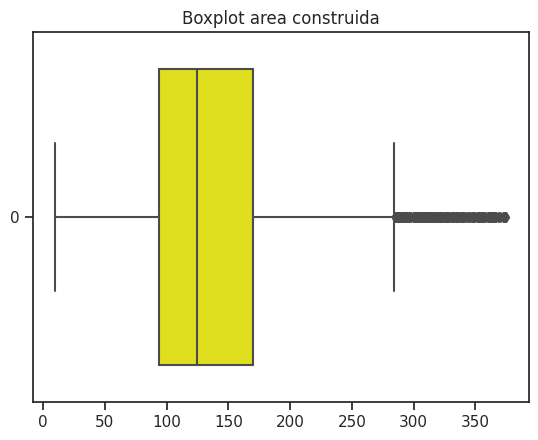

In [ ]:
#Boxplot
ax = sb.boxplot(data=df0['BuildingArea'].values, orient='h', color='yellow')
ax.set_title('Boxplot area construida');
plt.show()

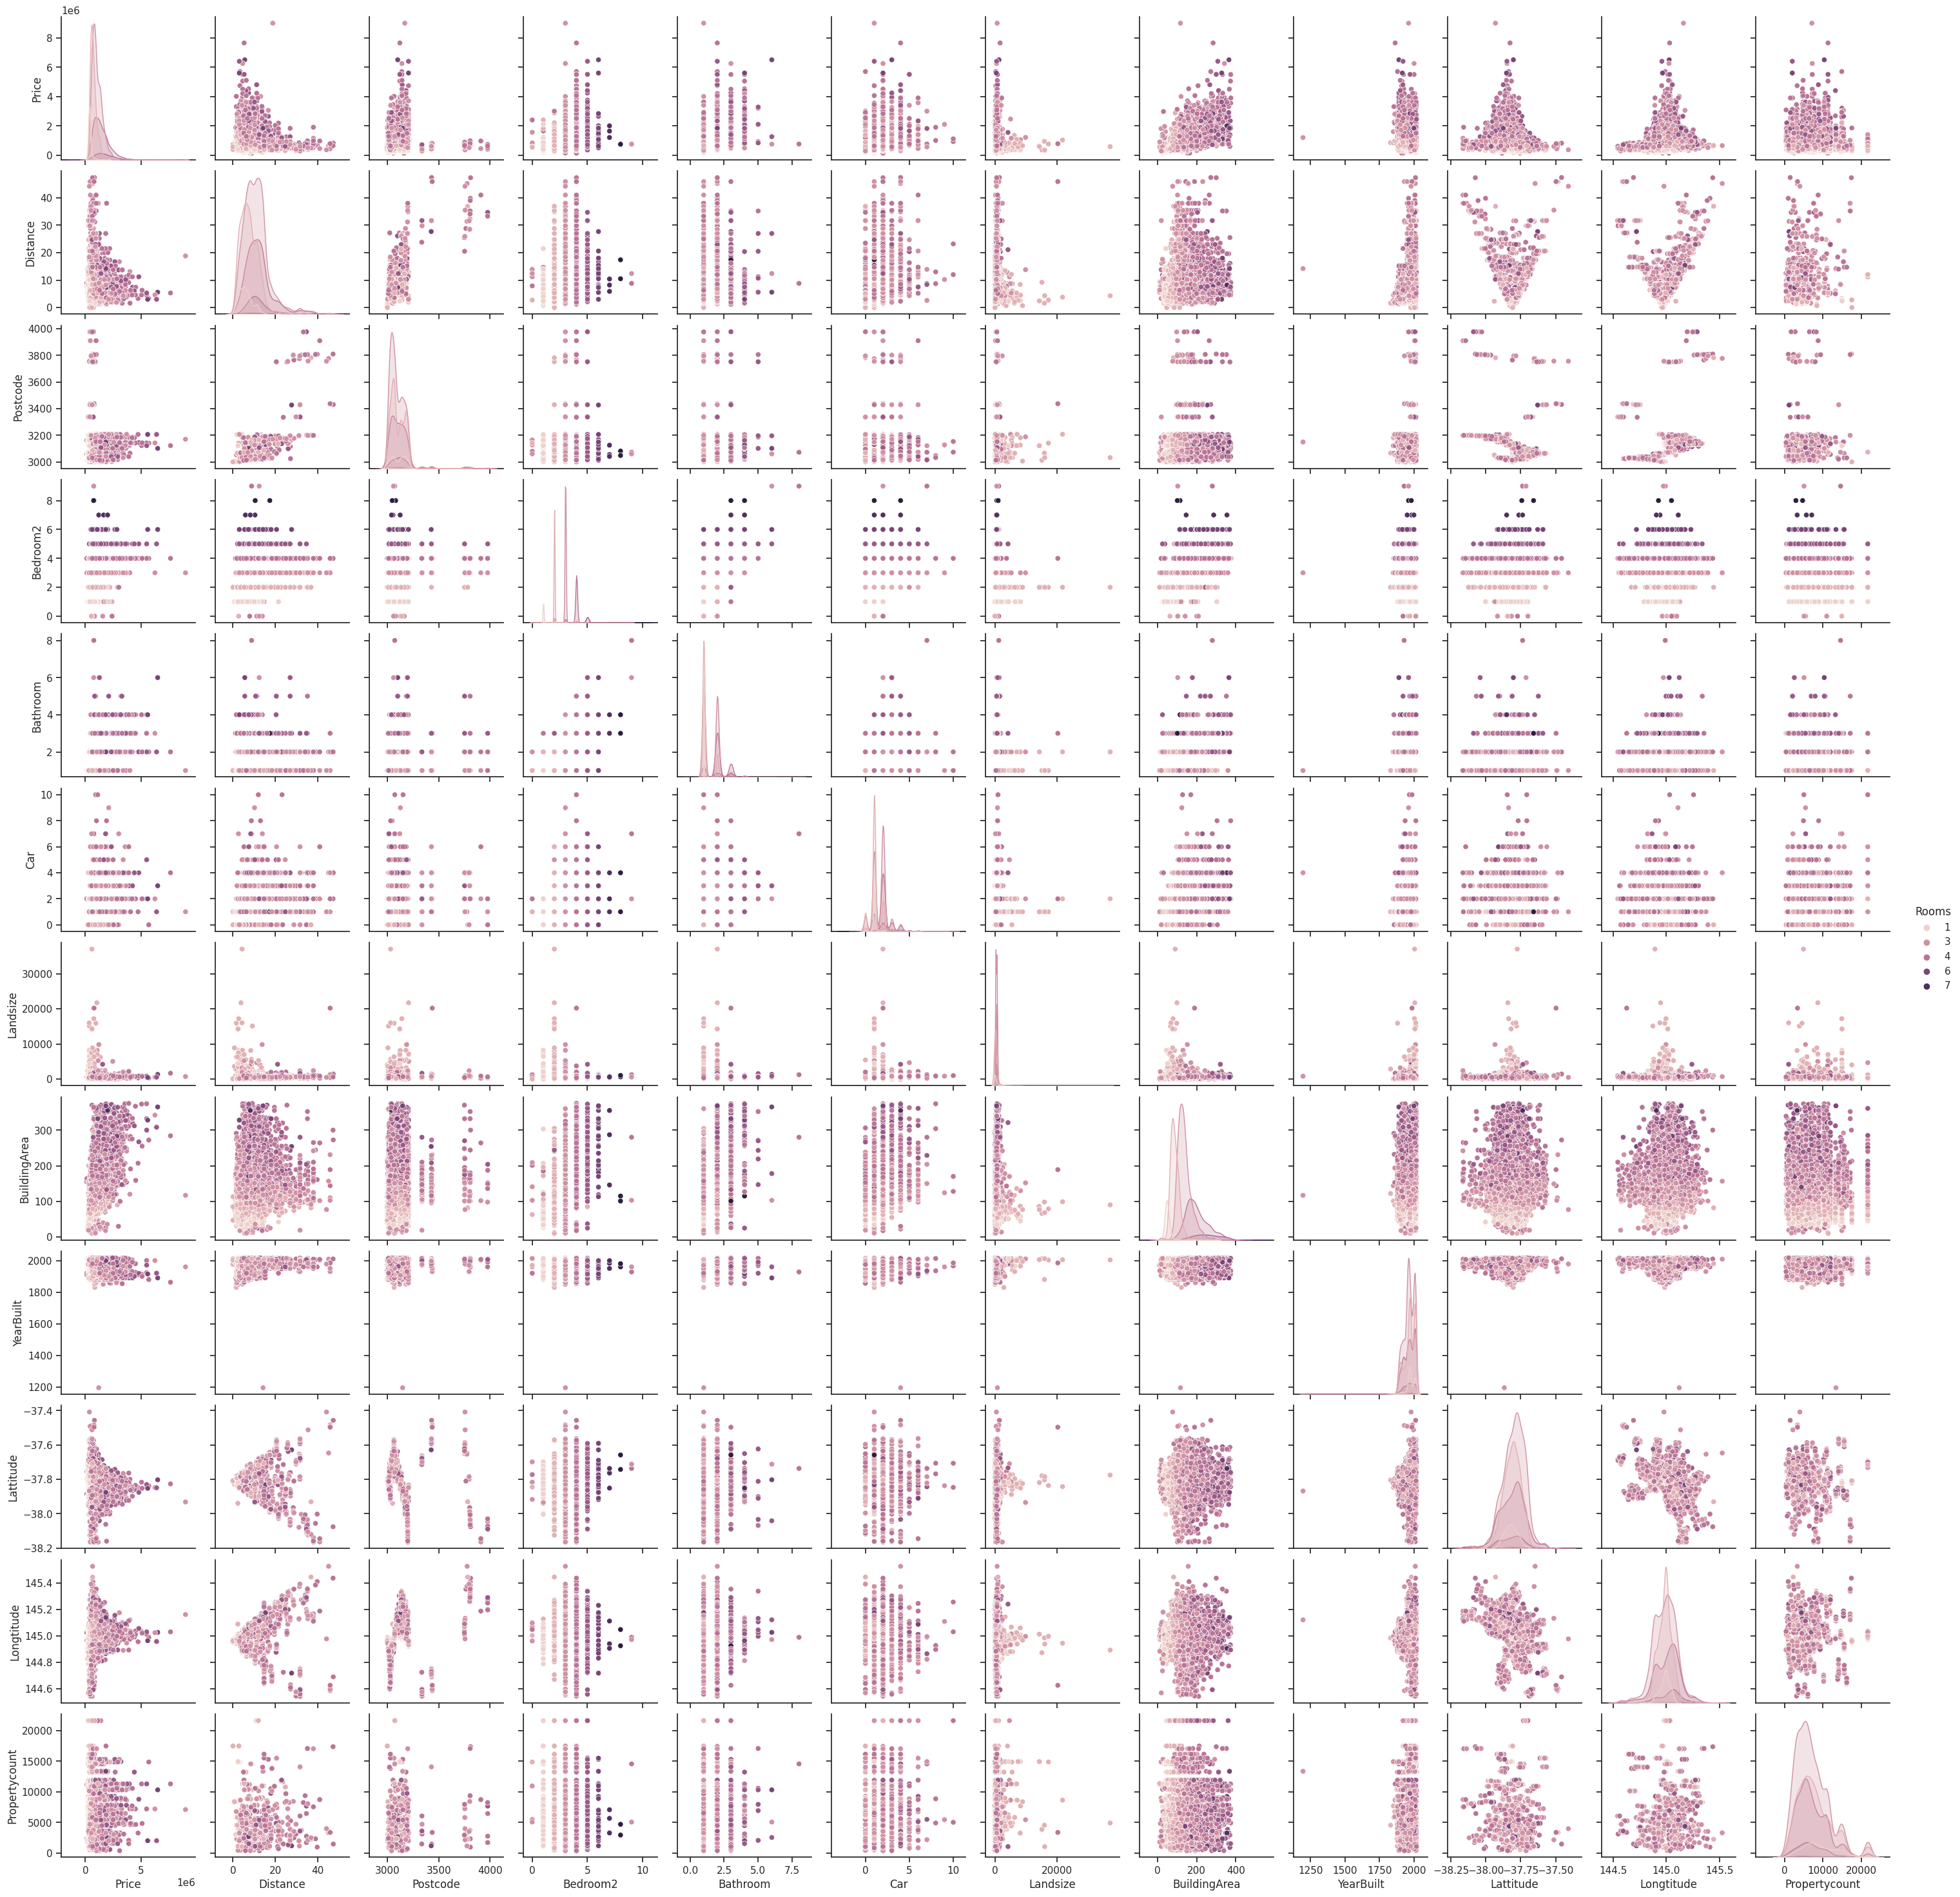

In [ ]:
#Múltiples diagramas por parejas
sb.set_theme(style="ticks")
sb.pairplot(df0, hue='Rooms')

In [ ]:
#Correlación entre variables
corr_test = pearsonr(x = df['BuildingArea'], y = df['Price'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.5204915813803511
P-value:  0.0


<Axes: title={'center': 'Pearson Correlation of Features'}>

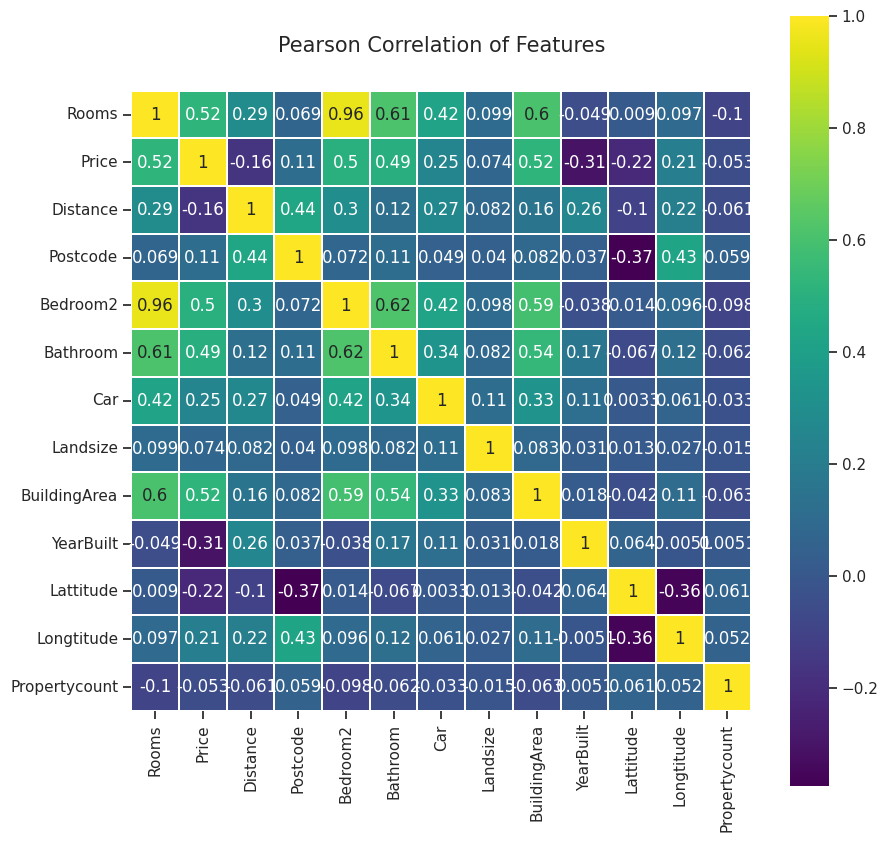

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
df0[df0["Landsize"]==0].count()

Rooms            1007
Price            1007
Distance         1007
Postcode         1007
Bedroom2         1007
Bathroom         1007
Car              1007
Landsize         1007
BuildingArea     1007
YearBuilt        1007
Lattitude        1007
Longtitude       1007
Propertycount    1007
dtype: int64

Text(0.5, 1.0, 'Distribución de precio y area construida')

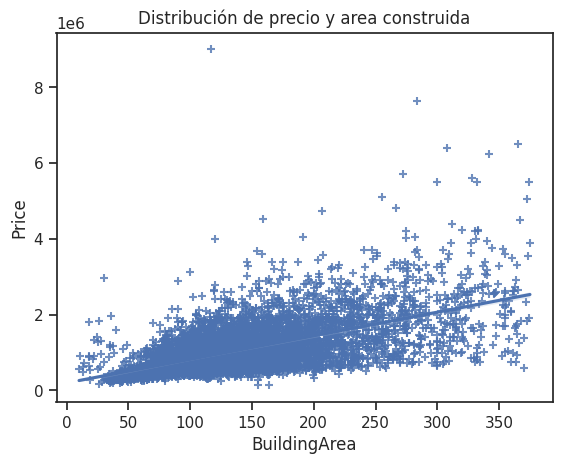

In [ ]:
sb.set_theme(color_codes=True)
sb.set_theme(style="ticks")
ax = sb.regplot(x="BuildingArea", y="Price", data=df0, marker='+', x_jitter=0.2, y_jitter=0.2)
ax.set_title('Distribución de precio y area construida')

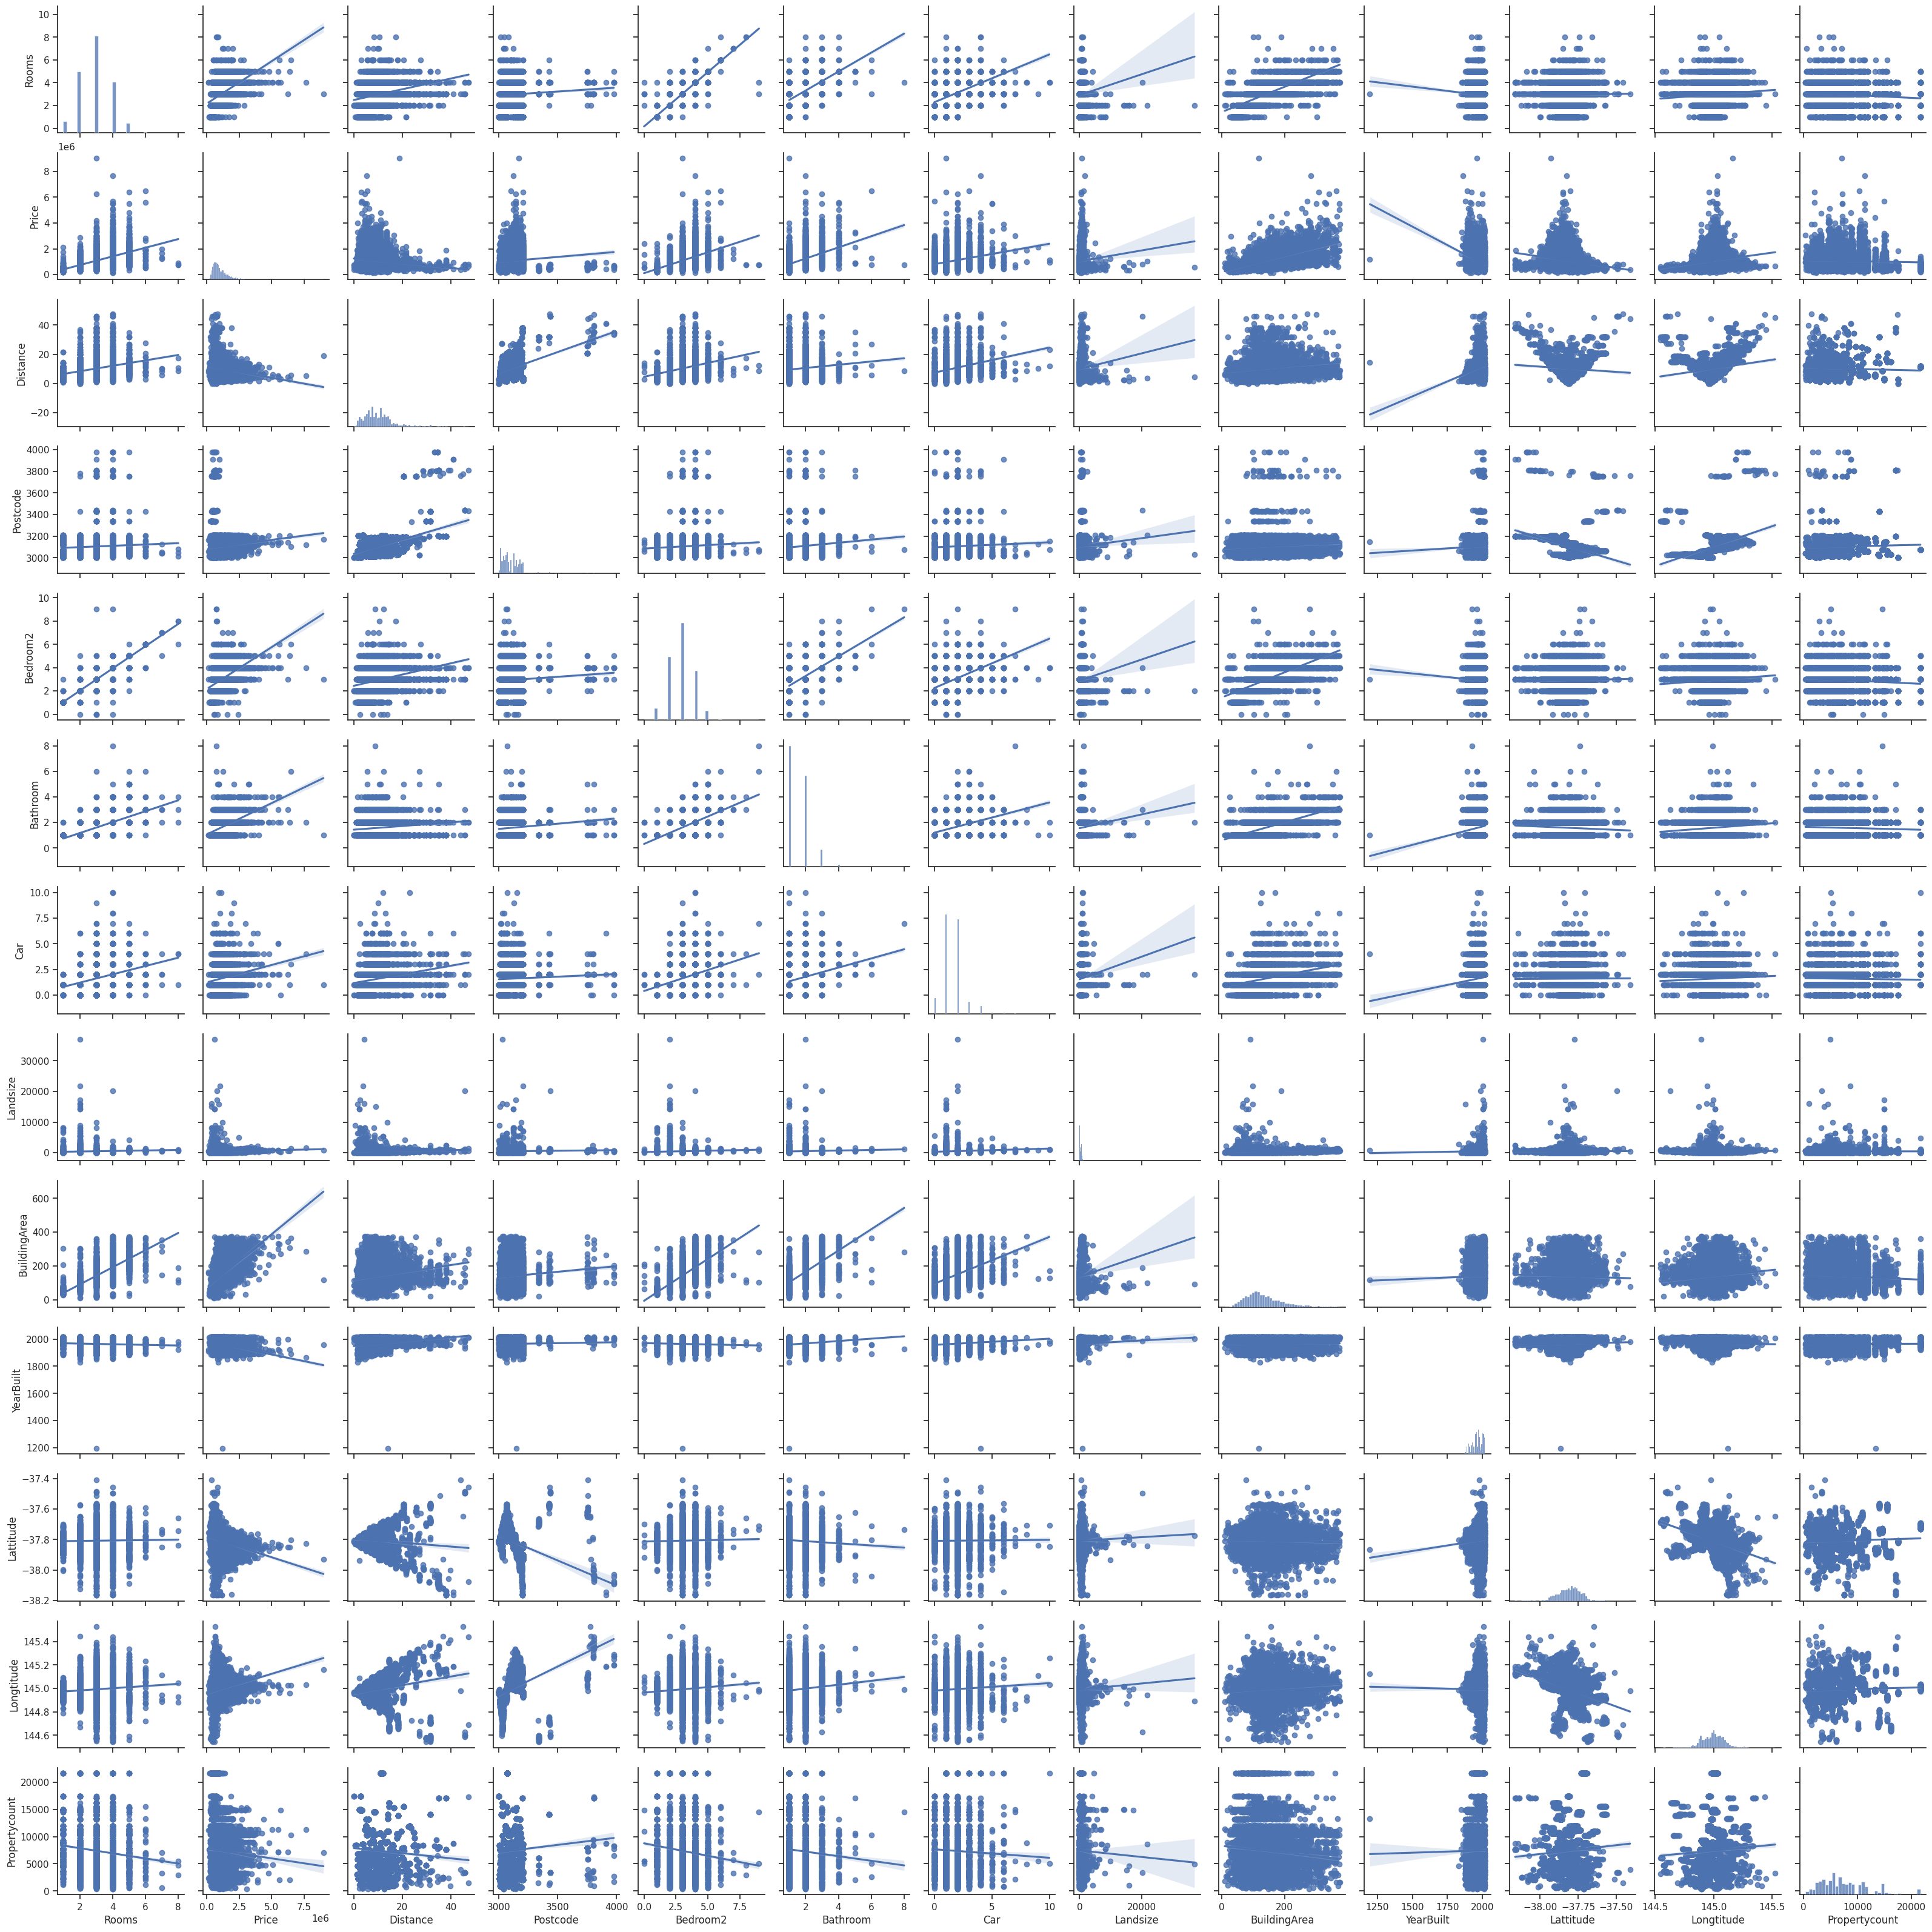

In [ ]:
sb.pairplot(df0, kind='reg')

In [ ]:
#Regresión lineal (Area construida vs. Precio)
x = df0["BuildingArea"]
y = df0["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     4315.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:30:15   Log-Likelihood:                -97109.
No. Observations:                6678   AIC:                         1.942e+05
Df Residuals:                    6676   BIC:                         1.942e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.987e+05   1.45e+04     13.732   

In [ ]:
df0 = df0.drop(['Bedroom2', 'Postcode', 'Lattitude', 'Longtitude'], axis=1)

In [ ]:
df0.dtypes

Rooms              int64
Price            float64
Distance         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Propertycount    float64
dtype: object

In [ ]:
#Regresión lineal múltiple
x = df0.iloc[:,[0,3,6]]
y = df0["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     1465.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:30:15   Log-Likelihood:                -97084.
No. Observations:                6678   AIC:                         1.942e+05
Df Residuals:                    6674   BIC:                         1.942e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.114e+05   2.05e+04      5.442   

In [ ]:
print(est2.rsquared)

0.39704051249185723


# Buscar combinación de 3 que de el r-squared más alto

In [ ]:
#Constantes

#numero de columnas
numcol=len(df0.columns)
#columna de la variable a comparar (precio)
coly=1

#Variables

#r cuadrado más alto
maxrsquared=0
#Columnas donde se da el r cuadrado mas alto
bestcolumns=[0,0,0]
#Numero de combinacion
contador=0

for i in range(numcol):
  if (i !=coly):
    for j in range(numcol):
      if (j !=coly)&(i != j)&(j>i):
        for k in range(numcol):
          if (k !=coly)&(i != k)&(j != k)&(k>i)&(k>j):
            contador+=1

            #Hacer regresion
            x = df0.iloc[:,[i,j,k]]
            y = df0[df0.columns[coly]]
            x2 = sm.add_constant(x)
            est = sm.OLS(y, x2)
            est2 = est.fit()

            #comparar r cuadrado
            if est2.rsquared > maxrsquared:
              maxrsquared=est2.rsquared
              bestcolumns=[i,j,k]

            #Numero de combinacion
            print("#Comb:", contador, end="\t")
            #Array x de la combinacion
            print("Array x:", "[", i, ",", j, ",", k, "]", end="\t")
            #R-squared
            print("R-squared: ", est2.rsquared, end="\t")
            #Nombres de columnas
            print("Columnas:", "[", df0.columns[i], ",", df0.columns[j], ",", df0.columns[k], "]", "\t", end="\t")


            #Mejor array x & mejor r-squared hasta el momento
            print("Mejor x:", bestcolumns, end="\t")
            print("Mejor r-squared:", maxrsquared)

#Comb: 1	Array x: [ 0 , 2 , 3 ]	R-squared:  0.3927751141465444	Columnas: [ Rooms , Distance , Bathroom ] 		Mejor x: [0, 2, 3]	Mejor r-squared: 0.3927751141465444
#Comb: 2	Array x: [ 0 , 2 , 4 ]	R-squared:  0.36731558971527967	Columnas: [ Rooms , Distance , Car ] 		Mejor x: [0, 2, 3]	Mejor r-squared: 0.3927751141465444
#Comb: 3	Array x: [ 0 , 2 , 5 ]	R-squared:  0.3612980962285922	Columnas: [ Rooms , Distance , Landsize ] 		Mejor x: [0, 2, 3]	Mejor r-squared: 0.3927751141465444
#Comb: 4	Array x: [ 0 , 2 , 6 ]	R-squared:  0.49866640008286	Columnas: [ Rooms , Distance , BuildingArea ] 		Mejor x: [0, 2, 6]	Mejor r-squared: 0.49866640008286
#Comb: 5	Array x: [ 0 , 2 , 7 ]	R-squared:  0.40857029073103057	Columnas: [ Rooms , Distance , YearBuilt ] 		Mejor x: [0, 2, 6]	Mejor r-squared: 0.49866640008286
#Comb: 6	Array x: [ 0 , 2 , 8 ]	R-squared:  0.36023751753413125	Columnas: [ Rooms , Distance , Propertycount ] 		Mejor x: [0, 2, 6]	Mejor r-squared: 0.49866640008286
#Comb: 7	Array x: [ 0 , 3 , 

In [ ]:
#Regresión lineal múltiple con el rsquared más alto (antes se debe ejecutar comando anterior)
x = df0.iloc[:,bestcolumns]
y = df0[df0.columns[coly]]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     2874.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:30:17   Log-Likelihood:                -96004.
No. Observations:                6678   AIC:                         1.920e+05
Df Residuals:                    6674   BIC:                         1.920e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.005e+07   2.79e+05     36.065   

# Genear modelo matemático

In [ ]:
#Predicciones con scikit-learn
train, test = train_test_split(df0, test_size = 0.20)
print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  5342
Ejemplos usados para test:  1336


In [ ]:
#Regresión lineal múltiple
x = train.iloc[:,[2,6,7]]
y = train["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     228.5
Date:                Wed, 23 Aug 2023   Prob (F-statistic):          1.70e-139
Time:                        11:58:44   Log-Likelihood:                -78729.
No. Observations:                5342   AIC:                         1.575e+05
Df Residuals:                    5338   BIC:                         1.575e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.001e+06   1.97e+04     50.896      0.0

In [ ]:
#Se definen las variables
x_train = train.iloc[:,[2,6,7]]
y_train = train.Price
x_test = test.iloc[:,[2,6,7]]
y_test = test.Price

In [ ]:
#Entrenamiento del modelo
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_train

10731     622000.0
10872     478000.0
778      1281000.0
1445     1700000.0
8013     2400000.0
           ...    
9693     2300000.0
1401     1350000.0
7812      310000.0
4211      335000.0
7745      495000.0
Name: Price, Length: 5342, dtype: float64

In [ ]:
#Predicción
y_pred = regr.predict(x_train)
y_pred

array([ 978844.47440477,  677589.90497936, 1670019.89986715, ...,
       1012452.86464662,  973296.94798053,  802189.27959104])

In [ ]:
print('Coeficientes:\n', regr.coef_)
print("Error cuadrático medio (Mean squared error): %.2f" % mean_squared_error(y_true=y_train, y_pred=y_pred, squared=False))
print('Coef. determinación (r^2): %.2f' % r2_score(y_train, y_pred))
print('w = ' + str(regr.coef_) + ', b = ' + str(regr.intercept_))

Coeficientes:
 [-2.71000302e+04  2.00369546e+05  3.35099463e+01]
Error cuadrático medio (Mean squared error): 608512.89
Coef. determinación (r^2): 0.11
w = [-2.71000302e+04  2.00369546e+05  3.35099463e+01], b = 1000567.6557459768


In [ ]:
predicciones = regr.predict(x_train)
for y, y_pred in list(zip(y_train, predicciones)) [:10]:
    print("Valor real: {:.2f} - Valor estimado: {:.2f}".format(y, y_pred))

Valor real: 622000.00 - Valor estimado: 978844.47
Valor real: 478000.00 - Valor estimado: 677589.90
Valor real: 1281000.00 - Valor estimado: 1670019.90
Valor real: 1700000.00 - Valor estimado: 1262226.25
Valor real: 2400000.00 - Valor estimado: 1195339.73
Valor real: 1410000.00 - Valor estimado: 1017290.29
Valor real: 860000.00 - Valor estimado: 1368172.71
Valor real: 930000.00 - Valor estimado: 1377484.17
Valor real: 400000.00 - Valor estimado: 920642.65
Valor real: 1275000.00 - Valor estimado: 1134900.44


In [ ]:
predicciones = regr.predict(X=x_test)
print(predicciones[0:10,])
rmse = mean_squared_error(y_true=y_test, y_pred=predicciones, squared=False)
print(f"\nEl error (rmse) del test es: {rmse}")

[ 854287.99333853 1210137.31195703 1193386.6414527  1092366.40312069
 1152157.14708738 1213115.39454397 1170887.25395129 1046661.56971657
  538147.31360961 1167166.47515041]

El error (rmse) del test es: 585837.8284807344


# Taller 4: comparar predicciones con datos reales


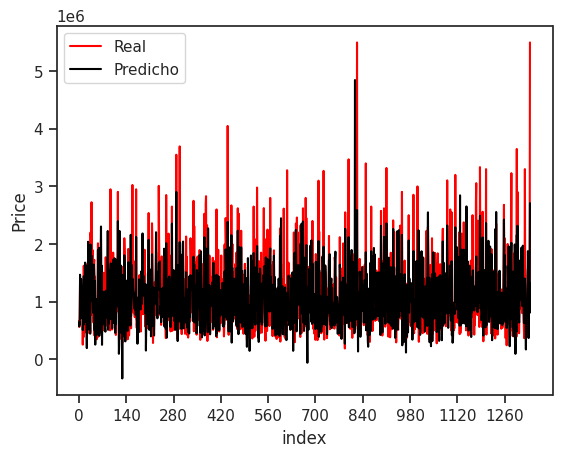

In [47]:
real = y_test
predicho = predicciones
index = np.arange(0, len(y_test), 1)
index = [str(x) for x in index]
plt.plot(index,real, label = 'Real', color = 'red')
plt.plot(index,predicho, label = 'Predicho', color = 'black')
plt.legend()
plt.xlabel("index")
plt.ylabel("Price")
plt.xticks(np.arange(0, len(y_test), 140))
plt.show()


In [48]:
#Coeficiente de correlacion
import scipy.stats
print("El coeficiente de correlación es: "+str(scipy.stats.pearsonr(real, predicho)[0]))

El coeficiente de correlación es: 0.750105792226968
